In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('online_car_sales.csv')
df.head()

,Unnamed: 0,unnamed,customer_id,advertisement_number,brand,model,variant,year,kilometer,color,transmission,fuel,city,ad_date,price
0,0,89732,5e179871bc3087fa6cb10a21,777375802,Volkswagen,Golf,1.6 FSi Midline,2005,186.0,dark_red,manual,gasoline,Istanbul,2/28/2023,308.75 TL
1,1,89733,5e179871bc3087fa6cb10a22,777255310,Volkswagen,Golf,1.2 TSI Midline Plus,2016,13.6,red,manual,gasoline,Izmir,2/12/2023,705.25 TL
2,2,89734,5e179871bc3087fa6cb10a23,776963108,Volkswagen,Jetta,1.2 TSI Trendline,2012,108.0,white,manual,gasoline,Erzurum,2/23/2023,468.0 TL
3,3,89735,5e179871bc3087fa6cb10a24,776938945,Volkswagen,Jetta,1.4 TSI Comfortline,2008,157.0,blue,manual,gasoline,Kutahya,2/14/2023,422.5 TL
4,4,89736,5e179871bc3087fa6cb10a25,776932300,Volkswagen,Jetta,1.2 TSI Trendline,2012,127.0,silver_gray,manual,gasoline,Kutahya,2/1/2023,507.0 TL


In [34]:
df1 = df[['year','price']]

In [35]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7600 entries, 0 to 7599
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    7600 non-null   int64 
 1   price   7600 non-null   object
dtypes: int64(1), object(1)
memory usage: 118.9+ KB


In [36]:
df1.head()

,year,price
0,2005,308.75 TL
1,2016,705.25 TL
2,2012,468.0 TL
3,2008,422.5 TL
4,2012,507.0 TL


In [37]:
df1['price'] = df1['price'].str.replace(' TL', '', regex=False).astype(float)

In [38]:
df1.head()

,year,price
0,2005,308.75
1,2016,705.25
2,2012,468.00
3,2008,422.50
4,2012,507.00


In [39]:
df_sorted = df1.sort_values(by='year')

In [40]:
df_sorted.tail()

,year,price
7381,2019,1052.350
1137,2019,1426.750
6581,2019,1337.375
6944,2020,1556.750
6751,2020,1662.375


# EDA

In [41]:
df_sorted.shape

(7600, 2)

In [42]:
df_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7600 entries, 2802 to 6751
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    7600 non-null   int64  
 1   price   7600 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 178.1 KB


In [48]:
# Menggunakan fungsi apply untuk mengubah setiap entri dalam kolom 'year'
df_sorted['year'] = df_sorted['year'].apply(lambda x: datetime(year=x, month=1, day=1))

In [49]:
df_sorted

,year,price
2802,1974-01-01,143.000
487,1974-01-01,175.500
437,1974-01-01,139.750
840,1974-01-01,169.000
25,1974-01-01,243.750
...,...,...
7381,2019-01-01,1052.350
1137,2019-01-01,1426.750
6581,2019-01-01,1337.375
6944,2020-01-01,1556.750


Text(0, 0.5, 'Num of Values')

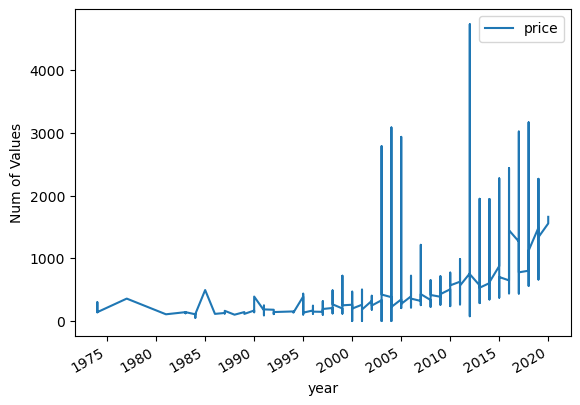

In [50]:
# Plot the data

df_sorted.columns = ['year', 'price']
df_sorted.year = pd.to_datetime(df_sorted.year)
df_sorted.set_index('year',inplace=True)
df_sorted.plot()
plt.xlabel('year')
plt.ylabel('Num of Values')

In [51]:
df_sorted

,price
year,
1974-01-01,143.000
1974-01-01,175.500
1974-01-01,139.750
1974-01-01,169.000
1974-01-01,243.750
...,...
2019-01-01,1052.350
2019-01-01,1426.750
2019-01-01,1337.375


# Check Stationarity

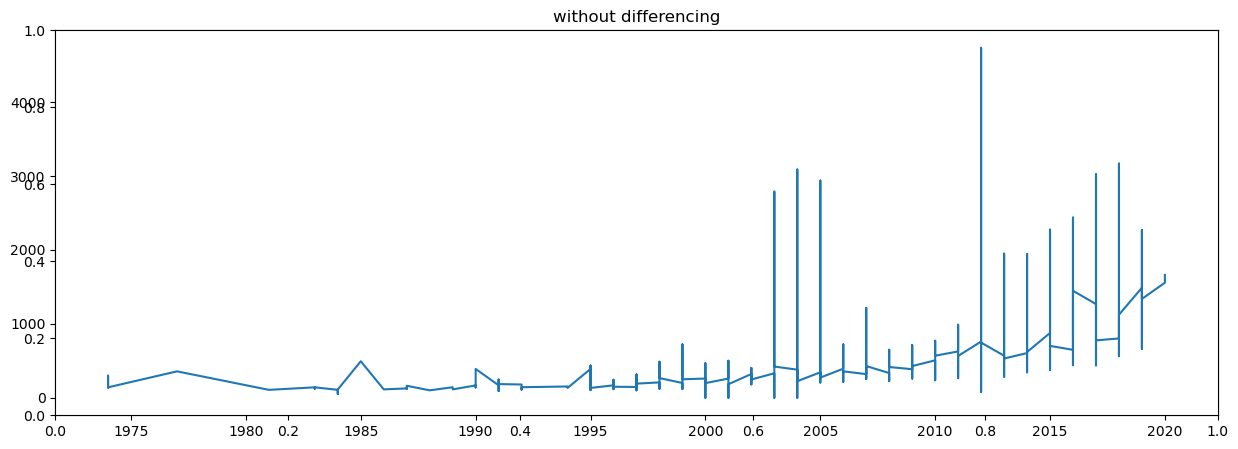

In [53]:
# Plot without differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('without differencing')
ax1.plot(df_sorted['price'])

In [54]:
# Create a function to check stationarity

def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [55]:
# Check stationarity of the dataset

check_stationarity(df_sorted['price'])

ADF Statistic: -1.020592
p-value: 0.745680
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary


In [56]:
# Check stationarity of the dataset

check_stationarity(df_sorted['price'].diff().diff().dropna())

ADF Statistic: -32.253659
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


In [59]:
df_sorted

,price
year,
1974-01-01,143.000
1974-01-01,175.500
1974-01-01,139.750
1974-01-01,169.000
1974-01-01,243.750
...,...
2019-01-01,1052.350
2019-01-01,1426.750
2019-01-01,1337.375


# Modeling

In [63]:
# Splitting dataset

train = df_sorted[:4000]
test = df_sorted[4000:]

print('Train size : ', train.shape)
print('Test size : ', test.shape)

Train size :  (4000, 1)
Test size :  (3600, 1)


In [64]:
train = train.dropna()
train

,price
year,
1974-01-01,143.00
1974-01-01,175.50
1974-01-01,139.75
1974-01-01,169.00
1974-01-01,243.75
...,...
2012-01-01,707.85
2012-01-01,507.00
2012-01-01,715.00


In [65]:
test

,price
year,
2012-01-01,395.850
2012-01-01,532.350
2012-01-01,624.000
2012-01-01,562.250
2012-01-01,576.875
...,...
2019-01-01,1052.350
2019-01-01,1426.750
2019-01-01,1337.375


In [72]:
# Stationarity check

check_stationarity(train['price'])

ADF Statistic: -3.168458
p-value: 0.021885
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Stationary


# **Naive Approach**

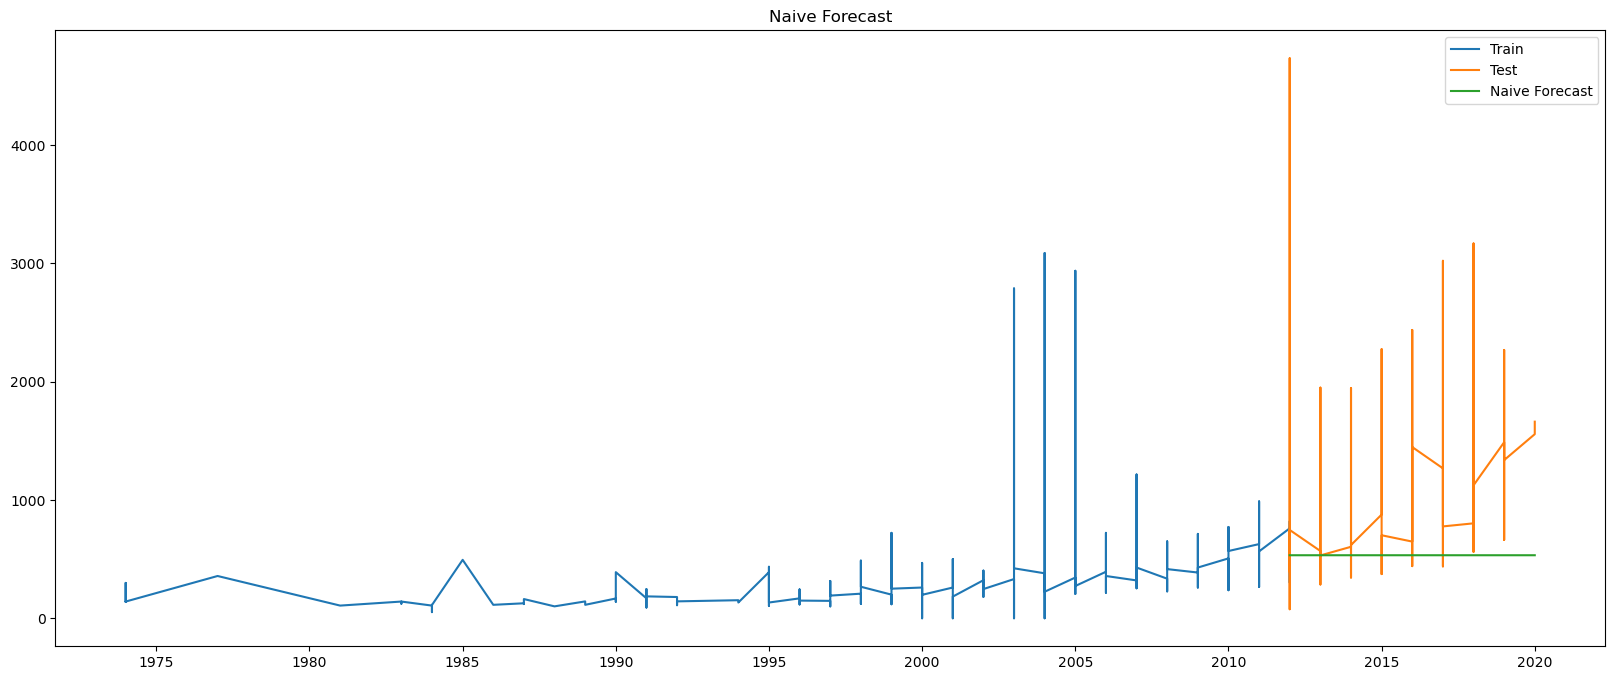

In [67]:
dd= np.asarray(train.price)
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]
plt.figure(figsize=(20,8))
plt.plot(train.index, train['price'], label='Train')
plt.plot(test.index,test['price'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt
rmse = sqrt(mean_squared_error(test.price, y_hat.naive))
mae = mean_absolute_error(test.price, y_hat.naive)

print("mae :",mae)
print("rmse :",rmse)

mae : 326.7908563888889
rmse : 442.57348958039836


# **Simple Average**

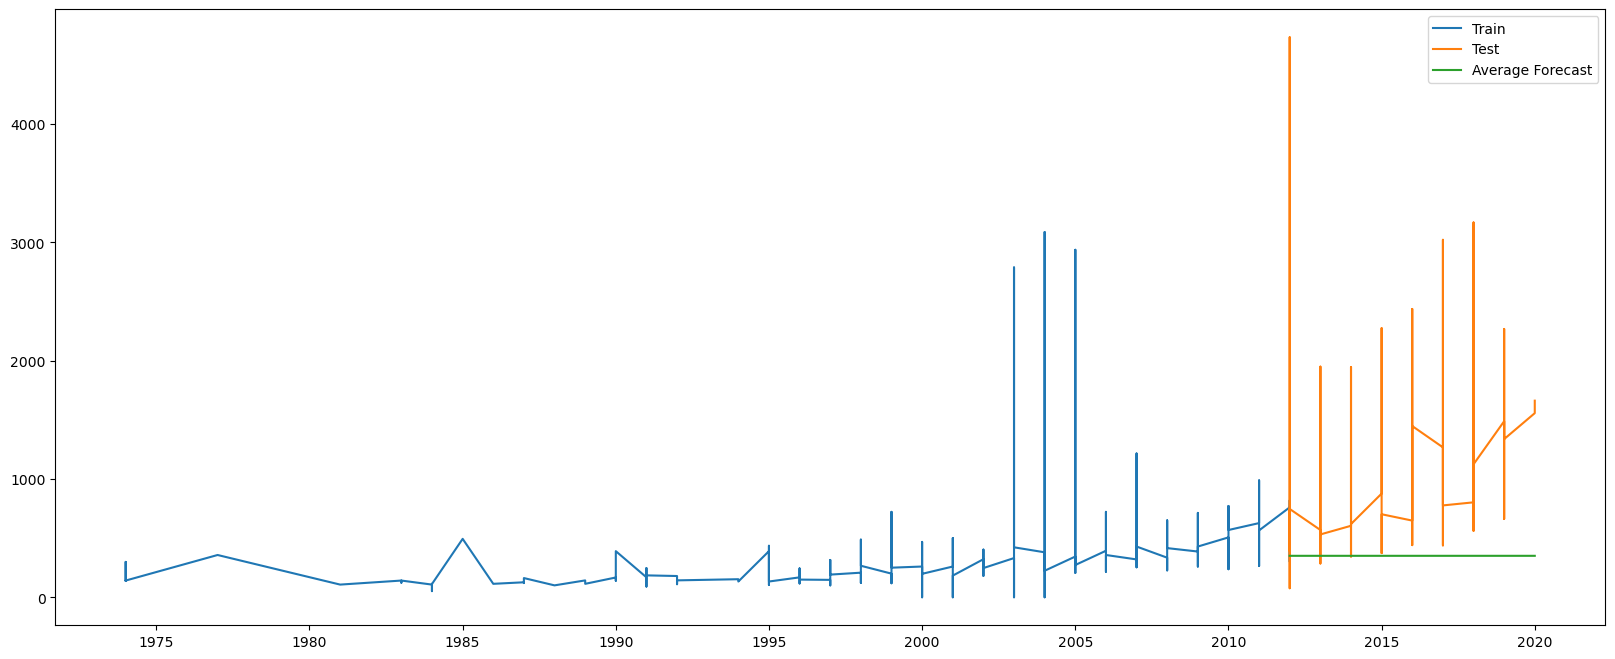

In [73]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['price'].mean()
plt.figure(figsize=(20,8))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')
plt.show()

In [74]:
print("mae :", mean_absolute_error(test.price, y_hat_avg.avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.price, y_hat_avg.avg_forecast)))

mae : 486.9242557423611
rmse : 583.1439133067804


# **Moving Average**

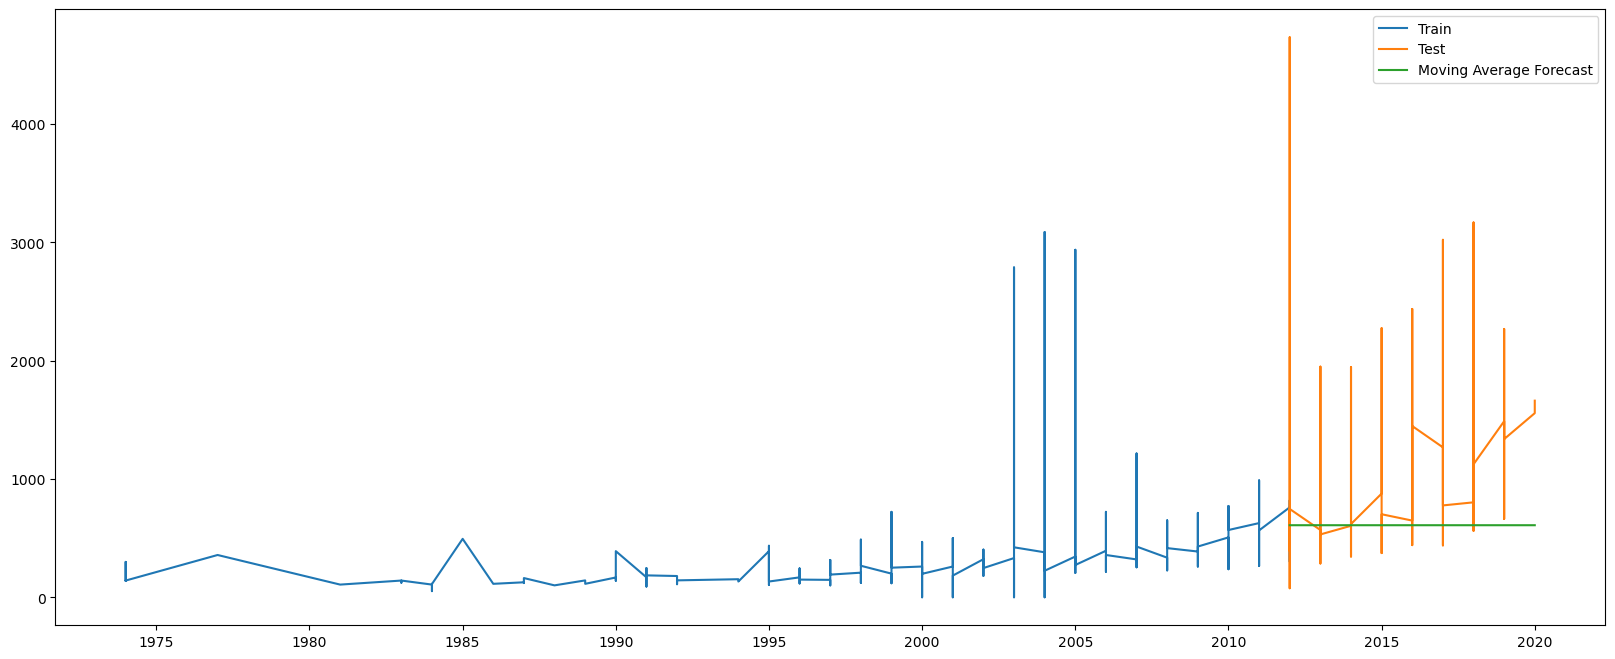

In [75]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train['price'].rolling(12).mean().iloc[-1]
plt.figure(figsize=(20,8))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')
plt.show()

In [76]:
print("mae :", mean_absolute_error(test.price, y_hat_avg.moving_avg_forecast))
print("rmse :", sqrt(mean_squared_error(test.price, y_hat_avg.moving_avg_forecast)))

mae : 278.0409255555556
rmse : 394.10966546433247


# **SES**

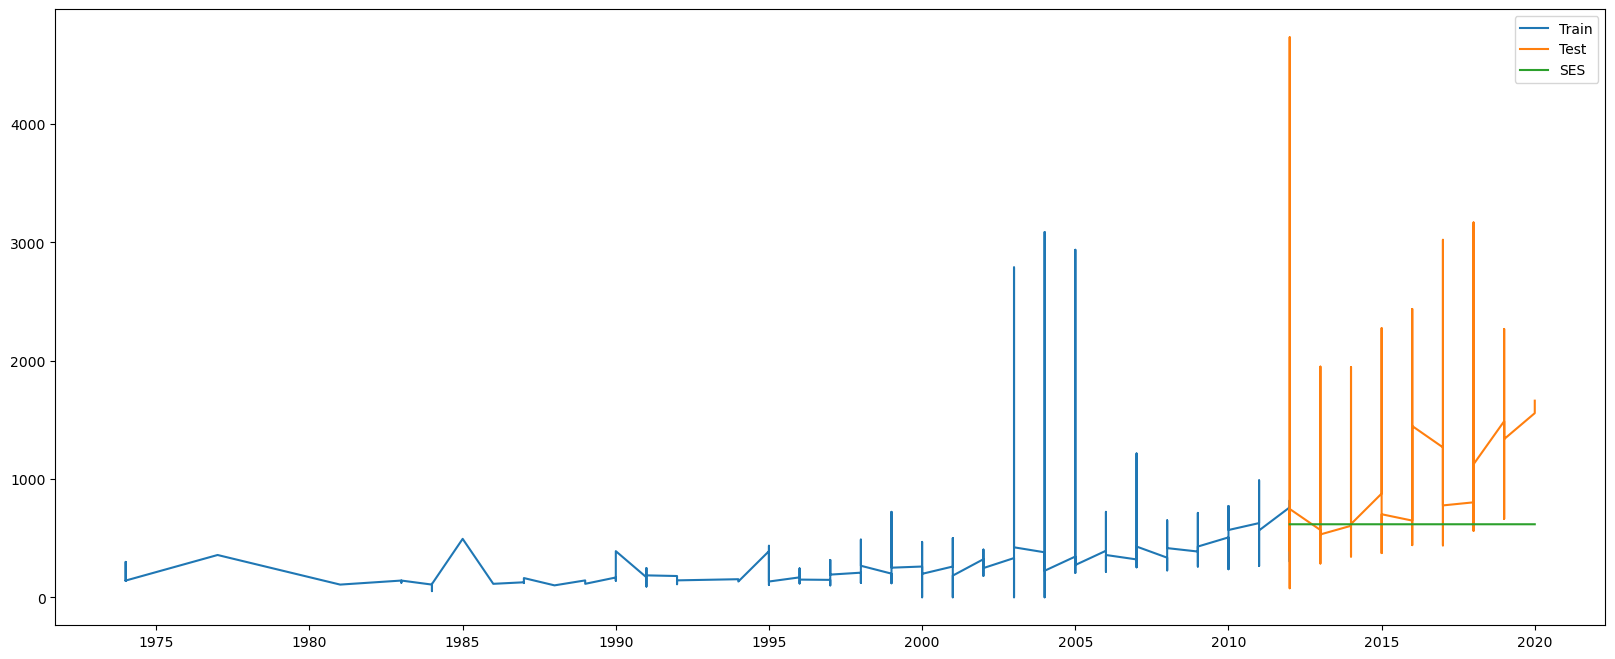

In [77]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['price'])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['price'], label='Train')
plt.plot(test['price'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.show()

In [78]:
print("mae :", mean_absolute_error(test.price, y_hat_avg.SES))
print("rmse :", sqrt(mean_squared_error(test.price, y_hat_avg.SES)))

mae : 273.7902615707576
rmse : 389.49708594378745


In [85]:
df.shape

(7600, 16)

In [86]:
273/7600

0.03592105263157895

Error  = 4%

In [88]:
fit2

In [89]:
test

,price
year,
2012-01-01,395.850
2012-01-01,532.350
2012-01-01,624.000
2012-01-01,562.250
2012-01-01,576.875
...,...
2019-01-01,1052.350
2019-01-01,1426.750
2019-01-01,1337.375


# Check plot ACF & PACF

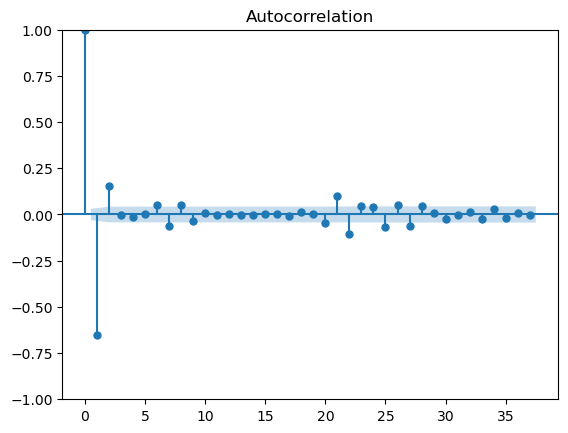

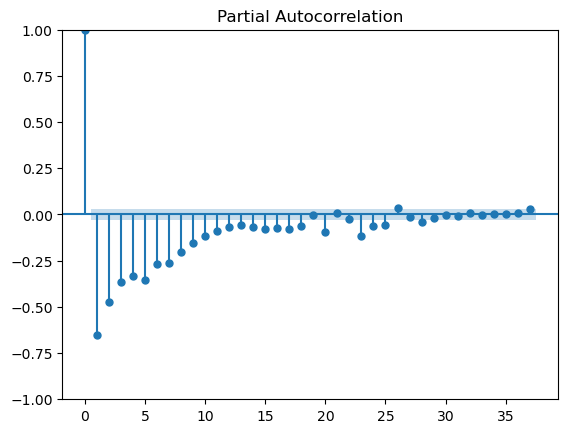

In [79]:
# Check plot ACF & PACF

plot_acf(train['price'].diff().diff().dropna())
plot_pacf(train['price'].diff().diff().dropna())
plt.show()

In [80]:
# Create a function to find best model

def find_best_model(data, num_p, num_d, num_q):
  df = pd.DataFrame() #We make a pandas dataframe to ease our work, you can use any way that makes you comfortable and work easly
  pdq = [[],[],[]] #This list for storing the combinations of p and q
  aic = [] # This list for storing aic value
  for p in range(num_p + 1): #plus one is to make the range up to num_p since python range only ranging from 0 to N-1
    for d in range(num_d + 1):
      for q in range(num_q + 1):
        # #if p!=0 and q!=0: #this logic will avoid (0,0) value which is not correct
        try: #Using exception to avoid the error while training the model with certain p and q value
          model = ARIMA(data, order=(p, d, q))
          result = model.fit()
          pdq[0].append(p)
          pdq[1].append(d)
          pdq[2].append(q)
          aic.append(result.aic)
        except:
          pass #If there is an error caused by the calculation, it will be skipped to the next iteration

  df['p'] = pdq[0]
  df['d'] = pdq[1]
  df['q'] = pdq[2]
  df['AIC'] = aic

  df.sort_values('AIC', inplace=True)

  return df.p.iloc[0], df.d.iloc[0], df.q.iloc[0], df.AIC.iloc[0], df

In [81]:
# Find best model of ARIMA with combinations of p=4, d=4, q=4
find_best_model(train['price'], 4, 4, 4)

(0,
 4,
 4,
 6625.568895267221,
     p  d  q           AIC
 24  0  4  4   6625.568895
 82  3  1  2  51021.687442
 32  1  1  2  51023.846749
 33  1  1  3  51025.006293
 57  2  1  2  51025.086463
 .. .. .. ..           ...
 70  2  4  0  61023.017884
 21  0  4  1  62373.031441
 15  0  3  0  62378.454621
 45  1  4  0  63335.791660
 20  0  4  0  67355.213788
 
 [125 rows x 4 columns])

In [83]:
# Train ARIMA with best combinations

model_arima_234 = ARIMA(train['price'], order=(0, 4, 4))
result_model_arima_234 = model_arima_234.fit()
print('The AIC is ', result_model_arima_234.aic)

The AIC is  6625.568895267221


In [84]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import numpy as np

# Assuming 'test' is your test dataset and it has a column 'Value' with the actual values

# Step 1: Predict the values using the fitted model for the length of the test set
# The forecast method's output depends on the statsmodels version
# We'll use the get_prediction and summary_frame functions for compatibility
forecast_results = result_model_arima_234.get_prediction(start=len(train), end=len(train)+len(test)-1)
predicted_mean = forecast_results.predicted_mean

# Step 2: Compare the predicted values with the actual values
actual_values = test['price'].values  # Ensure this is an array

# Step 3: Calculate the MAE and RMSE
mae = mean_absolute_error(actual_values, predicted_mean)
rmse = sqrt(mean_squared_error(actual_values, predicted_mean))

print('The MAE is', mae)
print('The RMSE is', rmse)


The MAE is 41766450.98631676
The RMSE is 47459476.76972607
